## PCA

计算PCA时，基本上是计算（相关或协方差）矩阵的特征值和特征向量。
1000个特征的原始数据集实际上可以计算1000个特征向量。
当set n_components=2时 您只想计算前两个特征向量（与它们关联的最大特征值的向量）, components_包含这些特征向量。

它们很重要，因为它们会编码您的投影规则。通过应用简单的矩阵乘法，从样本所在的初始空间到缩减的二维空间。
proyected_sample = a_sample * np.transpose( my_pca.components_ )

In [73]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

data = load_iris()
n_components = 2 # 将减少后的维度设置为2
model = PCA(n_components=n_components)
model = model.fit(data.data)
output=model.transform(data.data) # 变换后的数据

print(data.data.shape, '\n',data.data[0:5,:])
print(output.shape, '\n',output[0:5,:])

eigenVector=model.components_
print(eigenVector.shape, '\n',eigenVector)
print(model.explained_variance_ratio_)
print(model.explained_variance_)
print(model.singular_values_)

#proyected_sample = np.dot(data.data ,np.transpose(eigenVector)) 
#print(proyected_sample.shape, '\n',proyected_sample[0:5,:])


(150, 4) 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
(150, 2) 
 [[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]]
(2, 4) 
 [[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]
[0.92461872 0.05306648]
[4.22824171 0.24267075]
[25.09996044  6.01314738]


## 直观看PCA的过程

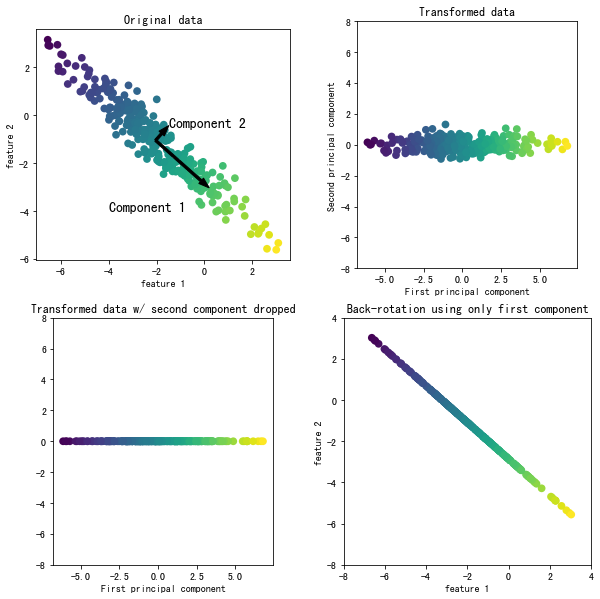

In [44]:
import mglearn
mglearn.plots.plot_pca_illustration()

## PCA的在图片压缩的作用

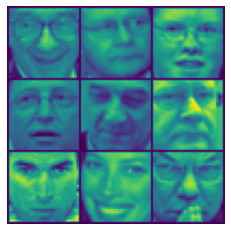

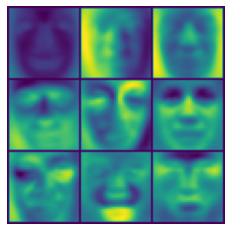

(5000, 1024)
(5000, 256)
(256, 1024)


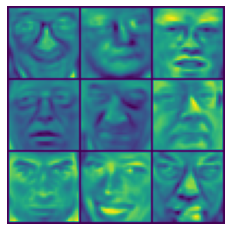

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as spio
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

datafile = '../resource/lawLite19/PCA/data_faces.mat'  

def draw_img(imgdata):
    num = 0

    m,n = imgdata.shape
    width = int(round(np.sqrt(n)))
    height = int(n/width)
    rows = int(np.floor(np.sqrt(m)))
    cols = int(np.ceil(m/rows))

    pad = 1
    draw_arr = -np.ones((pad+rows*(height+pad),pad+cols*(width+pad)))
    for i in range(rows):
        for j in range(cols):
            max_val = max(np.abs(imgdata[num,:]))
            draw_arr[pad+i*(height+pad):pad+i*(height+pad)+height,pad+j*(width+pad):pad+j*(width+pad)+width] = imgdata[num,:].reshape(height,width,order='F')/max_val
            num += 1
    plt.imshow(draw_arr)
    plt.axis('off')
    plt.show()   


def PCA_FACE():
    image_data = spio.loadmat(datafile)
    X = image_data['X']
    
    draw_img(X[0:9,:])

    scaler = StandardScaler()
    scaler.fit(X)
    x_train = scaler.transform(X)
    K = 256  #压缩后的维数
    model = PCA(n_components=K).fit(x_train)
    Z = model.transform(x_train)
    U_reduce = model.components_
    draw_img(U_reduce[0:9,:])

    print(X.shape)
    print(Z.shape)
    print(U_reduce.shape)

    X_rec = np.dot(Z,U_reduce)
    draw_img(X_rec[0:9,:])

PCA_FACE()